In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from matplotlib import pyplot as plt
from impl import *
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

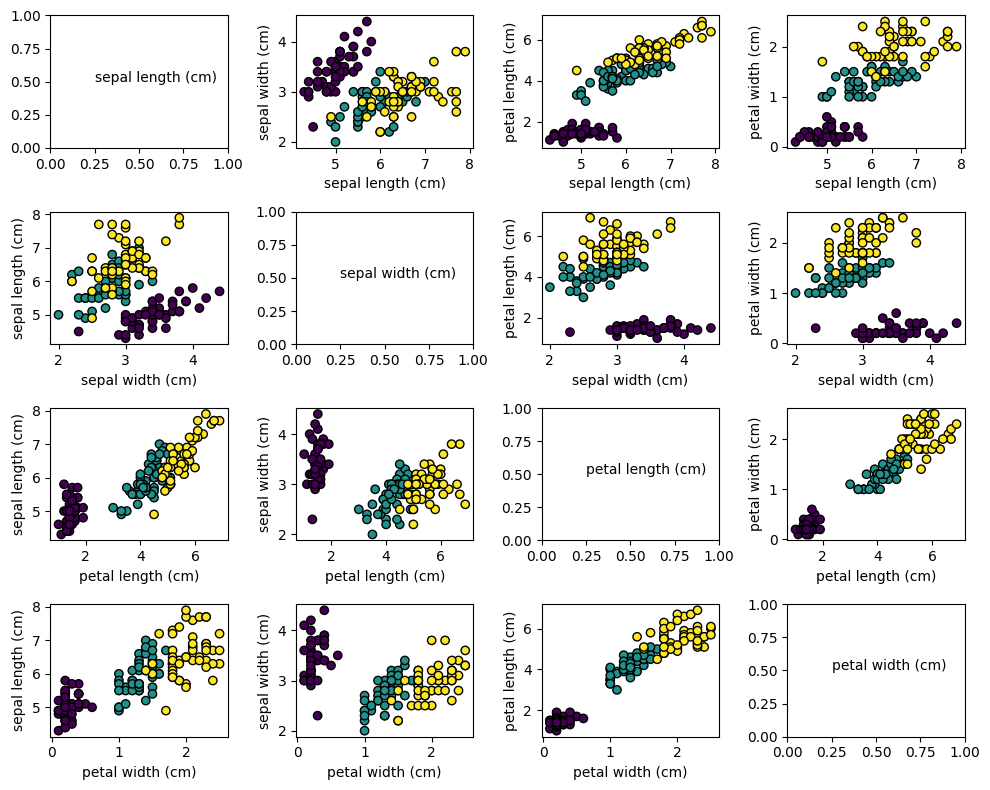

In [2]:
iris_ds = datasets.load_iris()
X = iris_ds.data
Y = iris_ds.target
f_names = iris_ds.feature_names

plt.figure(figsize=(10, 8), dpi=100)
plot_features_data(X, Y, f_names)

In [3]:
f_best = (2, 3)
f_best_names = (f_names[f_best[0]], f_names[f_best[1]])

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.5, random_state=20)

In [4]:
#p = np.random.permutation(len(train_x))
#train_x = train_x[p]
#train_y = train_y[p]

model = PotentialFunctionClassifier(2)
model.fit(train_x, train_y, 10)
model.reduce()
pred = model.predict(test_x)

print("Accuracy on test: ", metrics.accuracy_score(test_y, pred))
print("Accuracy on train: ", metrics.accuracy_score(train_y, model.predict(train_x)))
print("Accuracy on whole data: ", metrics.accuracy_score(Y, model.predict(X)))

Accuracy on test:  0.96
Accuracy on train:  1.0
Accuracy on whole data:  0.98


Charges of points:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


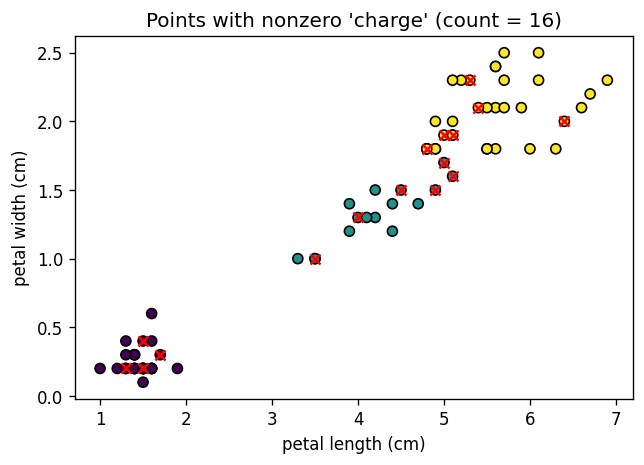

In [5]:
plt.figure(figsize=(6, 4), dpi=120)

plt.title(f"Points with nonzero 'charge' (count = {len(model.indexes)})")
plot_points(train_x[:, f_best[0]], train_x[:, f_best[1]], train_y, model.indexes, f_best_names)
print("Charges of points: ", model.charges)

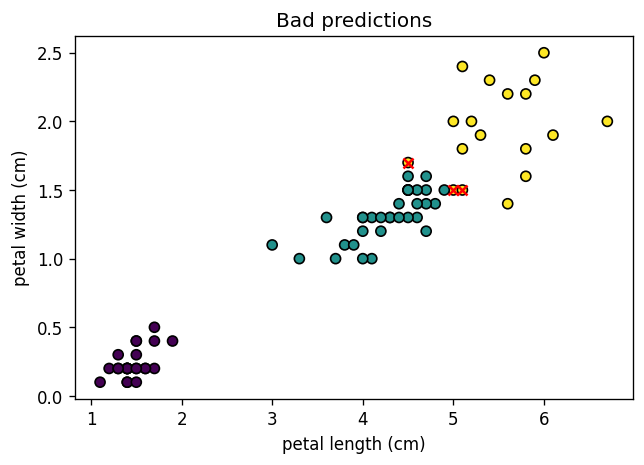

In [6]:
bad_pred_indices = np.argwhere(test_y != pred)

plt.figure(figsize=(6, 4), dpi=120)
plt.title("Bad predictions")
plot_points(test_x[:, f_best[0]], test_x[:, f_best[1]], test_y, bad_pred_indices, f_best_names)


In [7]:
model.clear()
model.widnow_size = 5
model.fit(train_x, train_y, 250)
pred = model.predict(test_x)


print("Accuracy on test: ", metrics.accuracy_score(test_y, pred))
print("Accuracy on train: ", metrics.accuracy_score(train_y, model.predict(train_x)))
print("Accuracy on whole data: ", metrics.accuracy_score(Y, model.predict(X)))

print("Charges:")
print(*model.charges)

Accuracy on test:  0.96
Accuracy on train:  1.0
Accuracy on whole data:  0.98
Charges:
1 1 0 0 1 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 1 2 0 0 2 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 2 0 1 2 0 0 0 0 0 2 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 2 0


In [8]:
model.charges += 1

pred = model.predict(test_x)

print("Accuracy on test: ", metrics.accuracy_score(test_y, pred))
print("Accuracy on train: ", metrics.accuracy_score(train_y, model.predict(train_x)))
print("Accuracy on whole data: ", metrics.accuracy_score(Y, model.predict(X)))

print("Charges:")
print(*model.charges)

Accuracy on test:  0.56
Accuracy on train:  0.7733333333333333
Accuracy on whole data:  0.6666666666666666
Charges:
2 2 1 1 2 3 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 2 3 1 1 3 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 3 1 2 3 1 1 1 1 1 3 1 2 2 2 1 1 2 1 1 1 1 1 2 1 1 1 3 1


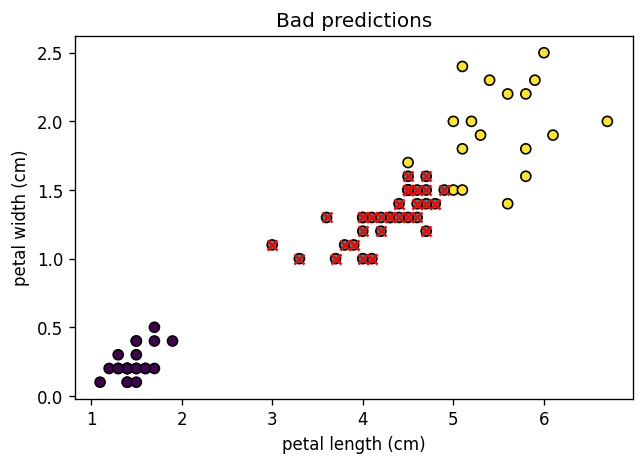

In [9]:
bad_pred_indices = np.argwhere(test_y != pred)

plt.figure(figsize=(6, 4), dpi=120)
plt.title("Bad predictions")
plot_points(test_x[:, f_best[0]], test_x[:, f_best[1]], test_y, bad_pred_indices, f_best_names)